## Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [4]:
concentric_df = pd.read_csv(r"C:\Task\demo_data\3.concertriccir2.csv",header = None)

### Insights of Dataset

In [5]:
concentric_df.head()
concentric_df.shape
concentric_df.info()
concentric_df.isna().sum()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


(500, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


0    0
1    0
2    0
dtype: int64

### Plotting Scatterplot to visualize the input and output

In [6]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

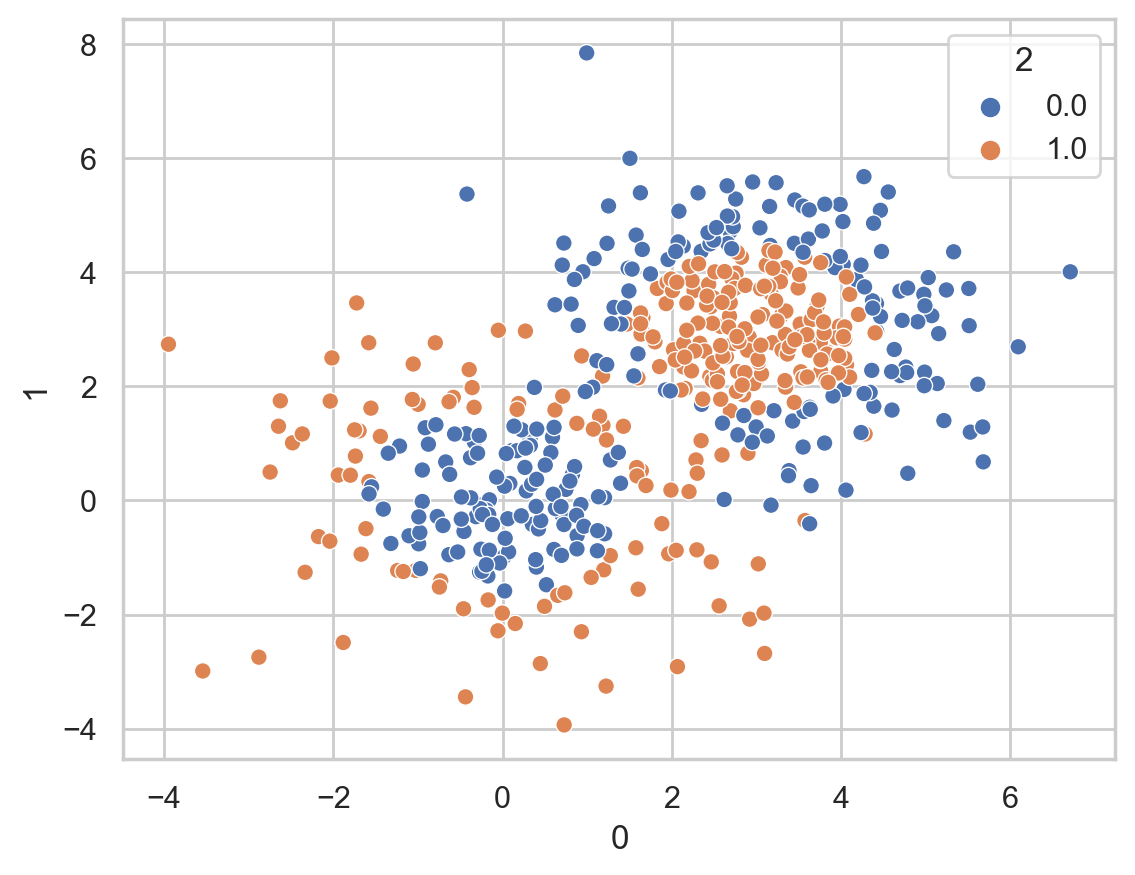

In [7]:
sns.set(style='whitegrid')
sns.scatterplot(x = concentric_df[0],y = concentric_df[1] ,hue = concentric_df[2],data = concentric_df);

### Train & test Split of the dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(concentric_df[[0,1]], concentric_df[2], test_size = 0.2)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [12]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [13]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_normal',input_dim = 2)) # No.of Neurons
model.add(Dense(5,activation = 'relu'))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [15]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_trainf,y_train,batch_size=13,epochs=283,validation_split=0.2)

Epoch 1/283


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


25/25 [==============================] - 1s 10ms/step - loss: 0.6966 - accuracy: 0.6094 - val_loss: 0.7039 - val_accuracy: 0.5125
Epoch 2/283
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.6219 - val_loss: 0.7025 - val_accuracy: 0.5250
Epoch 3/283
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.6219 - val_loss: 0.7011 - val_accuracy: 0.5125
Epoch 4/283
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.6156 - val_loss: 0.7000 - val_accuracy: 0.5125
Epoch 5/283
25/25 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6094 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 6/283
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6062 - val_loss: 0.7001 - val_accuracy: 0.4750
Epoch 7/283
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5906 - val_loss: 0.7008 - val_accuracy: 0.5250
Epoch 8/283
25/25 [=====

### Evaluation of Model

In [17]:
y_pred = model.predict(X_testf) 

4/4 [==============================] - 0s 1ms/step


In [18]:
y_capf = np.where(y_pred>0.5,1,0)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.84

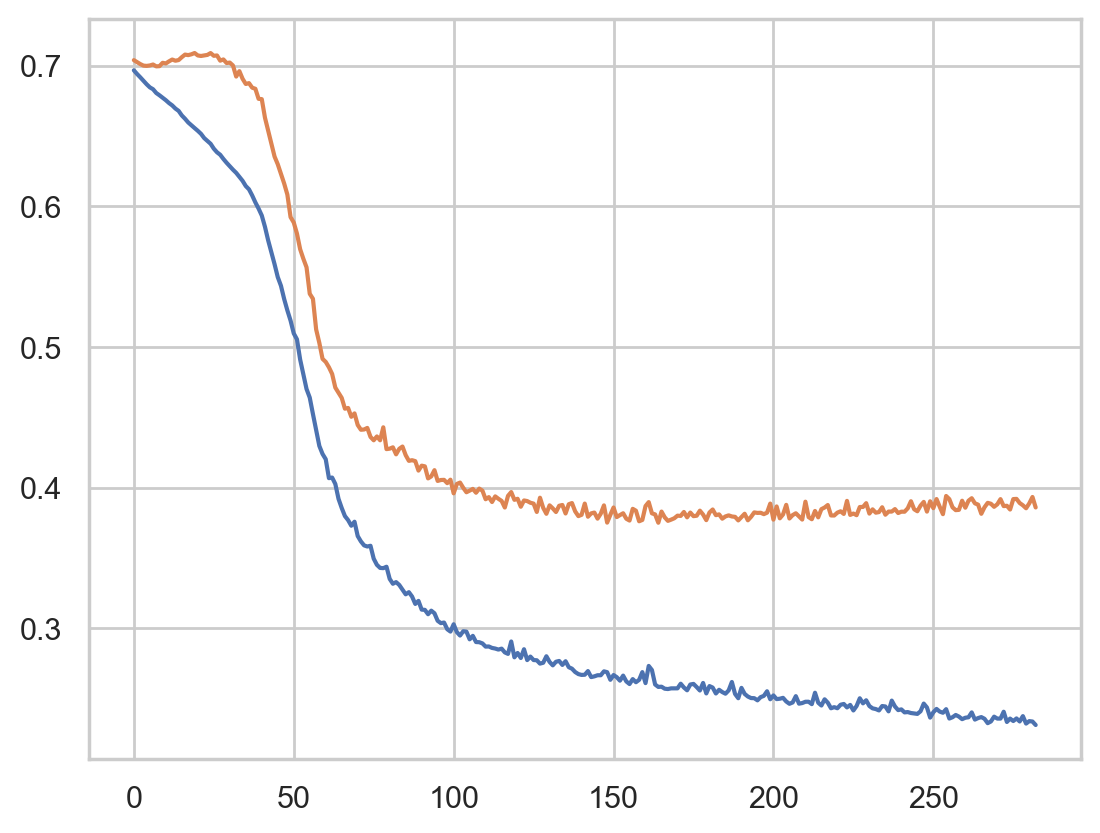

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [21]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 11s 1ms/step


<AxesSubplot: >

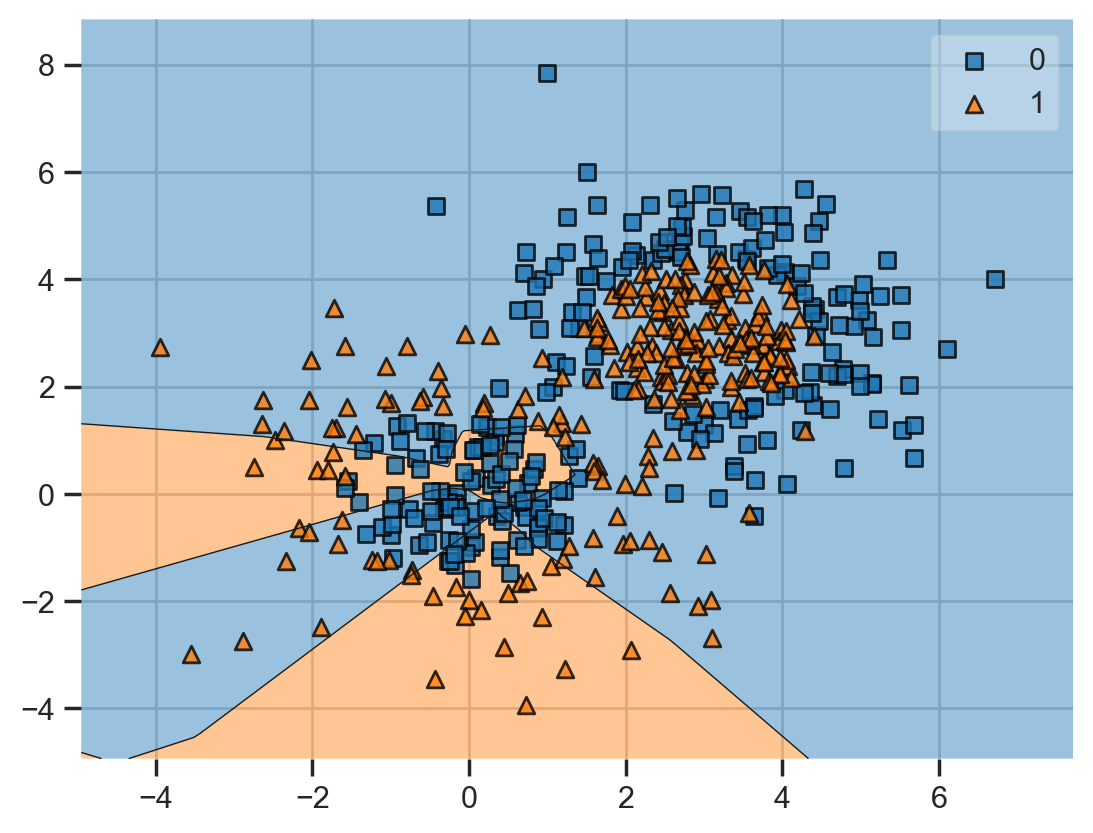

In [22]:
plot_decision_regions(concentric_df[[0,1]].values, concentric_df[2].values.astype(int), clf = model)

## 2nd Round

In [23]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'glorot_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(5,activation = 'relu',kernel_initializer = 'glorot_uniform'))
model.add(Dense(3,activation = 'relu',kernel_initializer = 'glorot_uniform'))
model.add(Dense(2,activation = 'relu',kernel_initializer = 'glorot_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 24        
                                                                 
 dense_6 (Dense)             (None, 5)                 45        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [25]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=200,validation_split=0.2)

Epoch 1/200


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


32/32 [==============================] - 2s 9ms/step - loss: 0.6937 - accuracy: 0.4781 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4875 - val_loss: 0.6927 - val_accuracy: 0.5500
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4750 - val_loss: 0.6927 - val_accuracy: 0.4875
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.4875 - val_loss: 0.6922 - val_accuracy: 0.4875
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4906 - val_loss: 0.6930 - val_accuracy: 0.4875
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.4625
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5437 - val_loss: 0.6923 - val_accuracy: 0.4500
Epoch 8/200
32/32 [======

### Evaluation of Model

In [27]:
y_pred = model.predict(X_testf) 

4/4 [==============================] - 0s 2ms/step


In [28]:
y_capf = np.where(y_pred>0.5,1,0)

In [29]:
accuracy_score(y_test,y_capf)

0.85

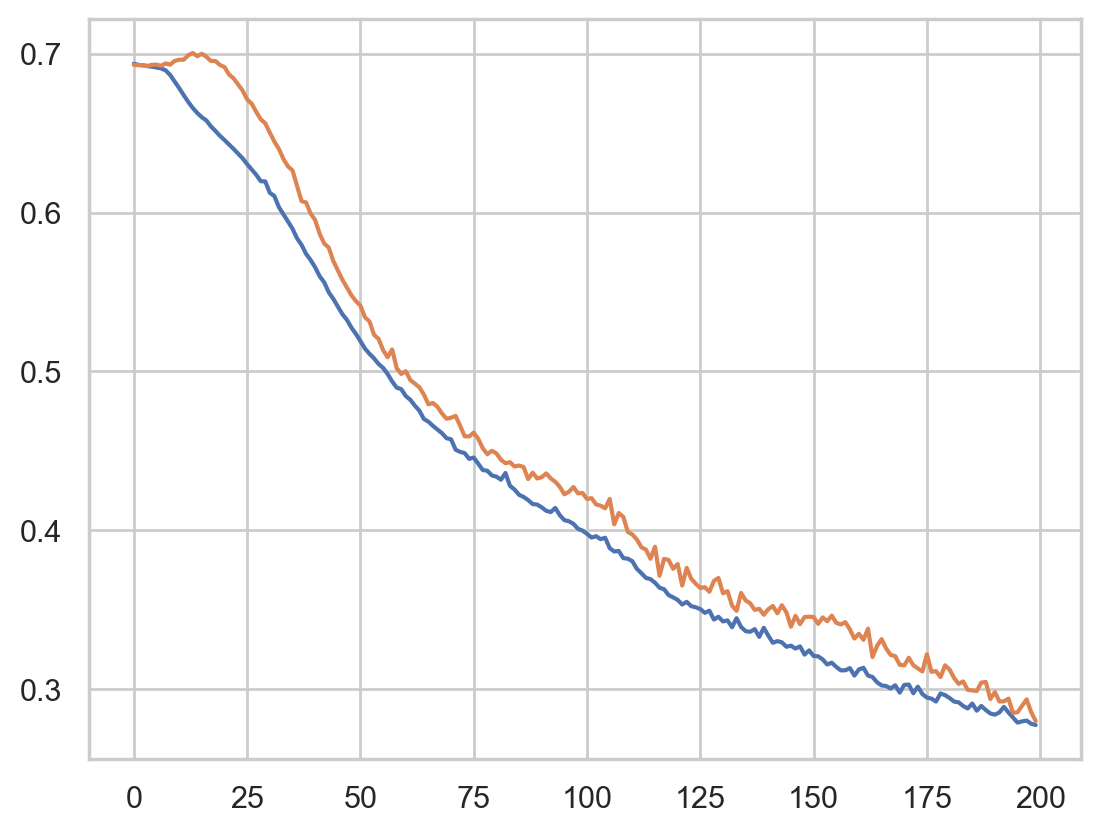

In [30]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 12s 1ms/step


<AxesSubplot: >

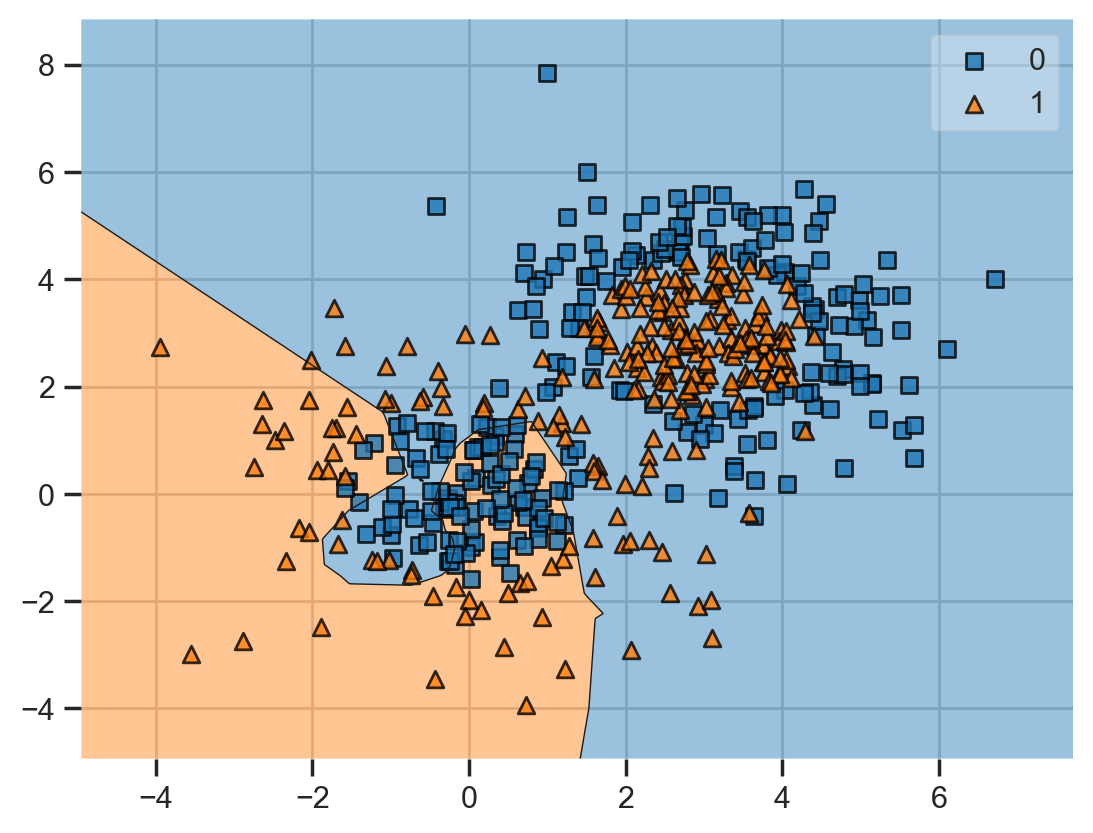

In [31]:
plot_decision_regions(concentric_df[[0,1]].values, concentric_df[2].values.astype(int), clf = model)

### 3rd round

In [32]:
model = Sequential()
model.add(Dense(3,activation = 'tanh',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons

model.add(Dense(2,activation = 'tanh'))

model.add(Dense(1,activation = 'sigmoid'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 9         
                                                                 
 dense_11 (Dense)            (None, 2)                 8         
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [34]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [35]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=500,validation_split=0.2)

Epoch 1/500


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


32/32 [==============================] - 1s 8ms/step - loss: 0.7015 - accuracy: 0.5500 - val_loss: 0.6953 - val_accuracy: 0.5750
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5875 - val_loss: 0.6959 - val_accuracy: 0.5750
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.6062 - val_loss: 0.6982 - val_accuracy: 0.5500
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.6156 - val_loss: 0.6994 - val_accuracy: 0.5875
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.6250 - val_loss: 0.7004 - val_accuracy: 0.5750
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.6438 - val_loss: 0.7012 - val_accuracy: 0.5750
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.6438 - val_loss: 0.7032 - val_accuracy: 0.5875
Epoch 8/500
32/32 [======

### Evaluation of Model

In [36]:
y_pred = model.predict(X_testf) 

4/4 [==============================] - 0s 469us/step


In [37]:
y_capf = np.where(y_pred>0.5,1,0)

In [38]:
accuracy_score(y_test,y_capf)

0.84

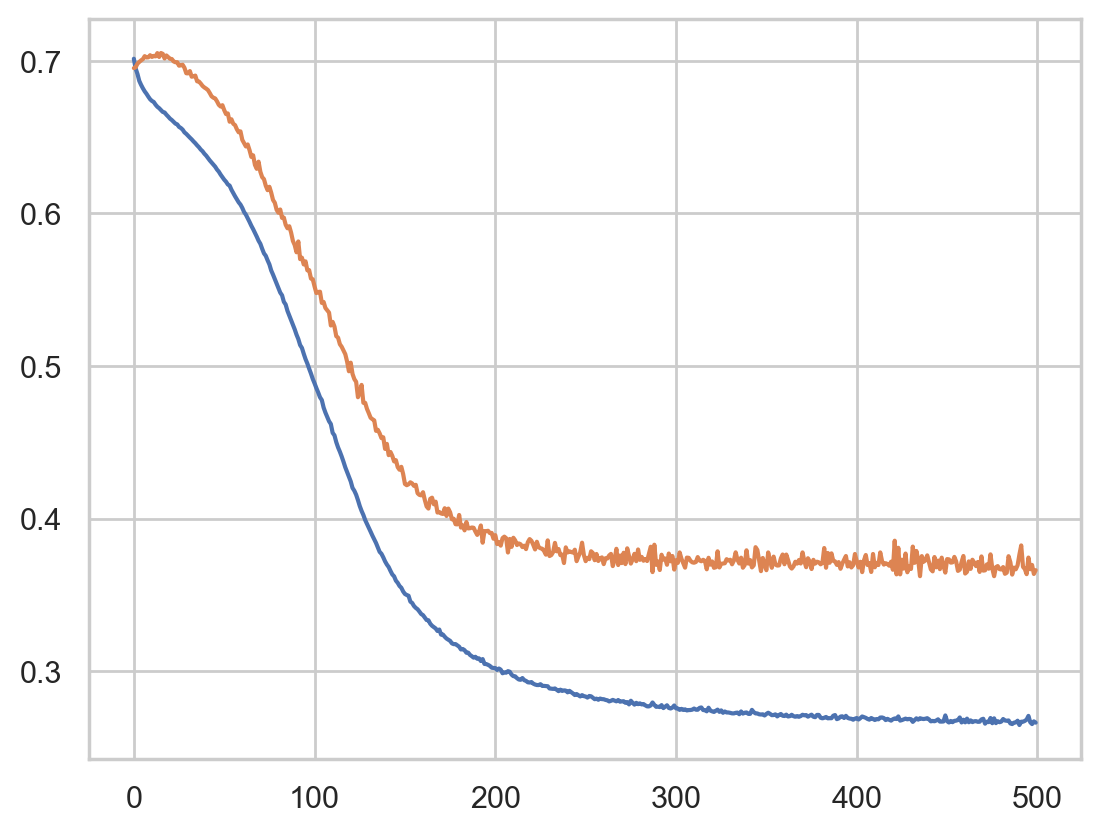

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 14s 1ms/step


<AxesSubplot: >

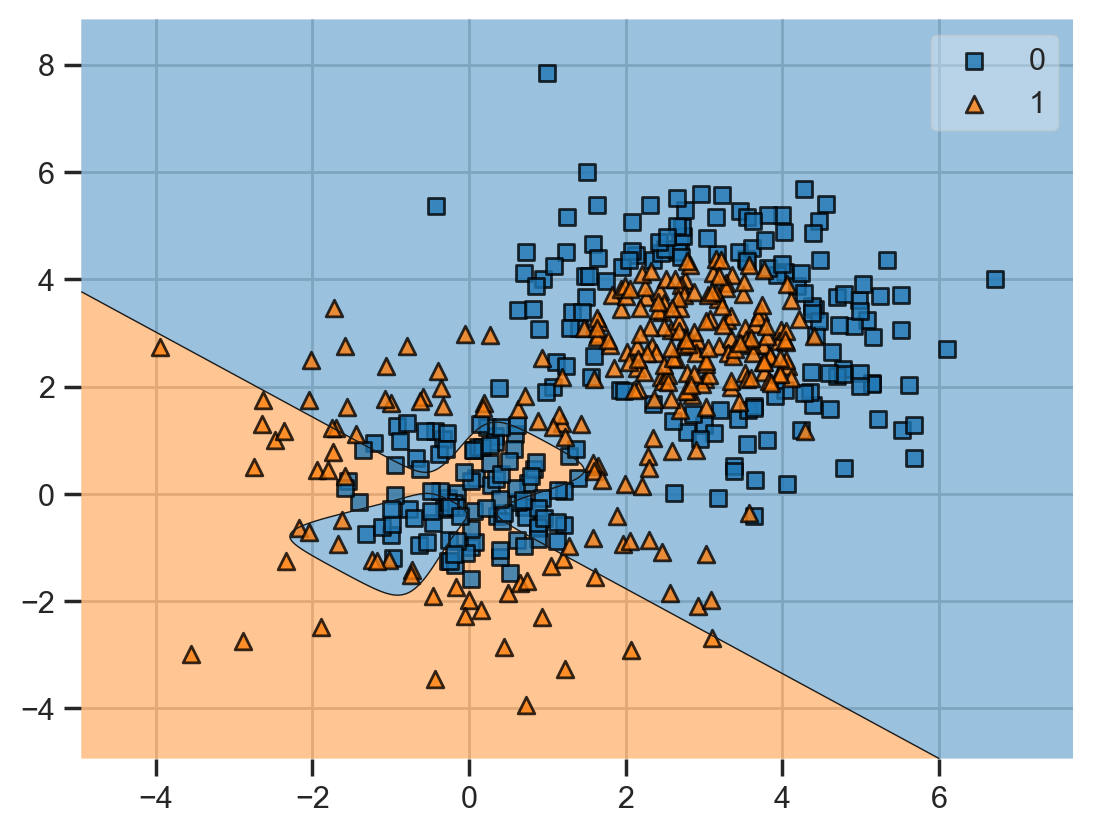

In [40]:
plot_decision_regions(concentric_df[[0,1]].values, concentric_df[2].values.astype(int), clf = model)